In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)

In [3]:
data = pd.read_csv('Company_x.csv')


In [4]:
df = data

In [5]:
df.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,932,Creditor 1,3677,0.00,"1,160.20","1,160.20",4.22,Other,PAID_IN_FULL,NaN,N,NaN,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,N,NaN,NaN,NaN
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,N,NaN,NaN,N,NaN,NaN,1.0,NaN,0,0,1,Y,NaN,NaN,NaN
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,N,NaN,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,N,NaN,NaN,NaN
3,160,Creditor 2,9859,"8,279.50","8,279.50","8,279.50",4.22,Other,PASSIVE,NaN,N,NaN,NaN,N,NaN,NaN,1.0,NaN,1,0,1,Y,NaN,NaN,NaN
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,N,NaN,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,Y,NaN,NaN,NaN


In [6]:
df.iloc[:,22:].value_counts() # last three columns have no data 

Series([], Name: count, dtype: int64)

In [7]:
# dropping those extra columns
df = df.iloc[:,0:22]

In [8]:
df.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,932,Creditor 1,3677,0.00,"1,160.20","1,160.20",4.22,Other,PAID_IN_FULL,NaN,N,NaN,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1,N
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,NaN,N,NaN,NaN,N,NaN,NaN,1.0,NaN,0,0,1,Y
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,NaN,N,NaN,NaN,N,5.37,Cheque,1.0,NaN,1,0,1,N
3,160,Creditor 2,9859,"8,279.50","8,279.50","8,279.50",4.22,Other,PASSIVE,NaN,N,NaN,NaN,N,NaN,NaN,1.0,NaN,1,0,1,Y
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,NaN,N,NaN,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1,Y


In [9]:
df.shape

(406423, 22)

In [10]:
df.describe()

,EntityID,AccountID,PurchasePrice,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
count,4.064230e+05,4.064230e+05,403731.000000,406301.000000,376941.000000,406423.000000,406423.000000,406423.000000
mean,3.970443e+07,3.954380e+08,5.618606,1.017145,45.728061,0.435652,0.208113,0.847354
std,4.698070e+07,4.654769e+08,5.441934,0.132866,12.950395,0.714852,0.434321,0.459690
min,1.600000e+02,3.677000e+03,0.190000,1.000000,-41.000000,0.000000,0.000000,0.000000
25%,3.010600e+06,3.023088e+07,3.070000,1.000000,36.000000,0.000000,0.000000,1.000000
50%,3.010949e+06,3.045075e+07,4.220000,1.000000,44.000000,0.000000,0.000000,1.000000
75%,9.990131e+07,9.901891e+08,6.590000,1.000000,54.000000,1.000000,0.000000,1.000000
max,9.990159e+07,9.904958e+08,52.180000,4.000000,133.000000,8.000000,5.000000,7.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  object 
 4   DebtLoadPrincipal           406423 non-null  object 
 5   Balanaceatdebt_load         406423 non-null  object 
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   ClosureReason               9030 non-null    object 
 10  InBankruptcy                406423 non-null  object 
 11  AccountInsolvencyType       285 non-null     object 
 12  CustomerInsolvencyType      8531 non-null    object 
 13  IsLegal       

In [12]:
df[df.duplicated()]

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,ClosureReason,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred


In [13]:
col_list = list(df.columns)
col_list

['EntityID',
 'OriginalCreditor[Redacted]',
 'AccountID',
 'CurrentBalance',
 'DebtLoadPrincipal',
 'Balanaceatdebt_load',
 'PurchasePrice',
 'ProductOrDebtType',
 'CollectionStatus',
 'ClosureReason',
 'InBankruptcy',
 'AccountInsolvencyType',
 'CustomerInsolvencyType',
 'IsLegal',
 'LastPaymentAmount',
 'LastPaymentMethod',
 'NumLiableParties',
 'CustomerAge',
 'NumPhones',
 'NumEmails',
 'NumAddresses',
 'IsStatBarred']

In [14]:
#Code to check if columns have missing values and what percentage.
cols = []
na_percent = []
for i in col_list:
    if df[i].isnull().sum() != 0:
        na_percent.append(df[i].isnull().sum()*100/len(df))
        cols.append(i)
miss_col_info = pd.DataFrame(list(zip(cols,na_percent)), columns = ['cols','na_percent'])

        

In [15]:
greater_than_70 = miss_col_info[miss_col_info['na_percent']>70]
less_than_70 = miss_col_info[miss_col_info['na_percent']<70]# Treat these later with imputation

In [16]:
greater_than_70

,cols,na_percent
1,ClosureReason,97.778177
2,AccountInsolvencyType,99.929876
3,CustomerInsolvencyType,97.900955
4,LastPaymentAmount,74.416556
5,LastPaymentMethod,74.416556


In [17]:
# checki ng to see if those with na values in the 70% range have any correlation with the target
# column has string values with a comma seperation, therefore needs to be preprocessed
df['LastPaymentAmount'] = df.LastPaymentAmount.str.replace(',','')

In [18]:
df['LastPaymentAmount'] = df['LastPaymentAmount'].astype(float)

In [19]:
df.IsStatBarred = df.IsStatBarred.map({'N':0, 'Y':1})

In [20]:
# checking the corr between this column and the target variable
df[['LastPaymentAmount','IsStatBarred']].corr()

,LastPaymentAmount,IsStatBarred
LastPaymentAmount,1.000000,-0.078078
IsStatBarred,-0.078078,1.000000


<Axes: xlabel='LastPaymentAmount', ylabel='IsStatBarred'>

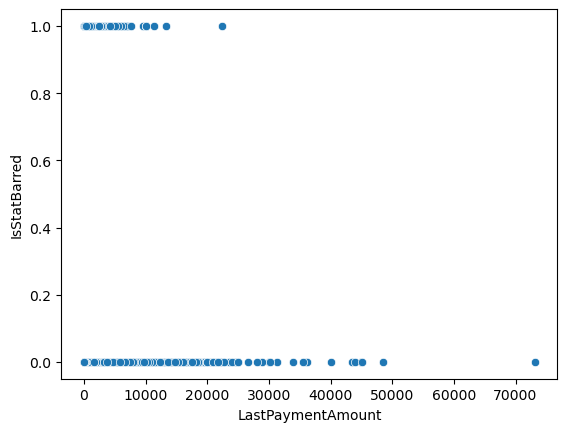

In [21]:
sns.scatterplot(data = df, x = 'LastPaymentAmount', y = 'IsStatBarred', palette = 'deep')

In [22]:
df.groupby('LastPaymentMethod')['IsStatBarred'].mean()

LastPaymentMethod
Automatic Payment           0.074546
Cash                        0.107770
Cheque                      0.259778
Credit Card / Debit Card    0.028520
Direct Credit               0.066492
Direct Debit                0.000366
Direct Transfer             0.032258
Mastercard                  0.285714
Unknown                     0.094003
Name: IsStatBarred, dtype: float64

In [23]:
# lets drop all the columns with 70% or more na values.
drop_cols = list(greater_than_70.cols)

In [24]:
df.drop(drop_cols, axis = 1, inplace = True)

In [25]:
df.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,932,Creditor 1,3677,0.00,"1,160.20","1,160.20",4.22,Other,PAID_IN_FULL,N,Y,1.0,53.0,0,0,1,0
1,160,Creditor 2,4276,182.90,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,N,N,1.0,NaN,0,0,1,1
2,932,Creditor 1,8525,0.00,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,1.0,NaN,1,0,1,0
3,160,Creditor 2,9859,"8,279.50","8,279.50","8,279.50",4.22,Other,PASSIVE,N,N,1.0,NaN,1,0,1,1
4,932,Creditor 1,12807,0.00,523.00,523.00,4.22,Other,PAID_IN_FULL,N,Y,1.0,46.0,2,0,1,1


In [26]:
df.shape

(406423, 17)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  object 
 4   DebtLoadPrincipal           406423 non-null  object 
 5   Balanaceatdebt_load         406423 non-null  object 
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   InBankruptcy                406423 non-null  object 
 10  IsLegal                     406423 non-null  object 
 11  NumLiableParties            406301 non-null  float64
 12  CustomerAge                 376941 non-null  float64
 13  NumPhones     

In [28]:
# cleaning the data 
'''those columns that have object datatype but hold a numeric value need to be studied and cleaned to see if there are any incorrect values or
datatypes contained within those columns'''
cols = list(df.columns)

In [29]:
check = []
for i in cols:
    if df[i].dtype == 'object':
        check.append(i)
check

['OriginalCreditor[Redacted]',
 'CurrentBalance',
 'DebtLoadPrincipal',
 'Balanaceatdebt_load',
 'ProductOrDebtType',
 'CollectionStatus',
 'InBankruptcy',
 'IsLegal']

In [30]:
df[check]

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal
0,Creditor 1,0.00,"1,160.20","1,160.20",Other,PAID_IN_FULL,N,Y
1,Creditor 2,182.90,182.90,182.90,Other,CANCELLED_WITHDRAWN,N,N
2,Creditor 1,0.00,538.57,538.57,Other,PAID_IN_FULL,N,N
3,Creditor 2,"8,279.50","8,279.50","8,279.50",Other,PASSIVE,N,N
4,Creditor 1,0.00,523.00,523.00,Other,PAID_IN_FULL,N,Y
...,...,...,...,...,...,...,...,...
406418,Creditor 50,448.20,448.20,448.20,Finance Company - Other,ACTIVE,N,N
406419,Creditor 50,"1,678.37","1,678.37","1,678.37",Finance Company - Other,ACTIVE,N,N
406420,Creditor 50,"3,512.60","3,512.60","3,512.60",Finance Company - Other,ACTIVE,N,N
406421,Creditor 50,"4,477.31","4,477.31","4,477.31",Finance Company - Other,ACTIVE,N,N


In [31]:
df.CurrentBalance = df.CurrentBalance.str.replace(',','')

In [32]:
df.CurrentBalance = df.CurrentBalance.astype(float)

In [33]:
df.DebtLoadPrincipal = df.DebtLoadPrincipal.str.replace(',','')
df.Balanaceatdebt_load = df.Balanaceatdebt_load.str.replace(',','')

In [34]:
df.DebtLoadPrincipal = df.DebtLoadPrincipal.astype(float)
df.Balanaceatdebt_load = df.Balanaceatdebt_load.astype(float)

In [35]:
df[check].head()

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal
0,Creditor 1,0.0,1160.20,1160.20,Other,PAID_IN_FULL,N,Y
1,Creditor 2,182.9,182.90,182.90,Other,CANCELLED_WITHDRAWN,N,N
2,Creditor 1,0.0,538.57,538.57,Other,PAID_IN_FULL,N,N
3,Creditor 2,8279.5,8279.50,8279.50,Other,PASSIVE,N,N
4,Creditor 1,0.0,523.00,523.00,Other,PAID_IN_FULL,N,Y


In [36]:
df.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,932,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,Y,1.0,53.0,0,0,1,0
1,160,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,N,N,1.0,NaN,0,0,1,1
2,932,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,1.0,NaN,1,0,1,0
3,160,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,N,N,1.0,NaN,1,0,1,1
4,932,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,N,Y,1.0,46.0,2,0,1,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   Balanaceatdebt_load         406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   InBankruptcy                406423 non-null  object 
 10  IsLegal                     406423 non-null  object 
 11  NumLiableParties            406301 non-null  float64
 12  CustomerAge                 376941 non-null  float64
 13  NumPhones     

In [38]:
#dropping id columns as they are not of much value to the model
df.drop(['EntityID','AccountID'], axis = 1, inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OriginalCreditor[Redacted]  406423 non-null  object 
 1   CurrentBalance              406423 non-null  float64
 2   DebtLoadPrincipal           406423 non-null  float64
 3   Balanaceatdebt_load         406423 non-null  float64
 4   PurchasePrice               403731 non-null  float64
 5   ProductOrDebtType           406423 non-null  object 
 6   CollectionStatus            406423 non-null  object 
 7   InBankruptcy                406423 non-null  object 
 8   IsLegal                     406423 non-null  object 
 9   NumLiableParties            406301 non-null  float64
 10  CustomerAge                 376941 non-null  float64
 11  NumPhones                   406423 non-null  int64  
 12  NumEmails                   406423 non-null  int64  
 13  NumAddresses  

In [40]:
miss_cols = list(less_than_70.cols)

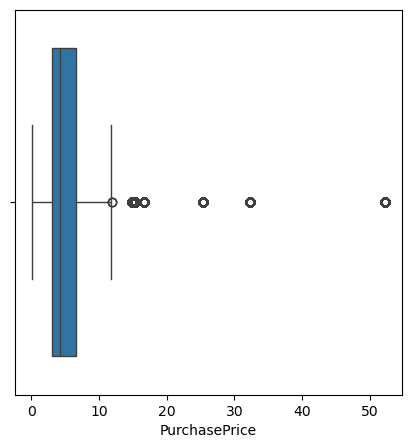

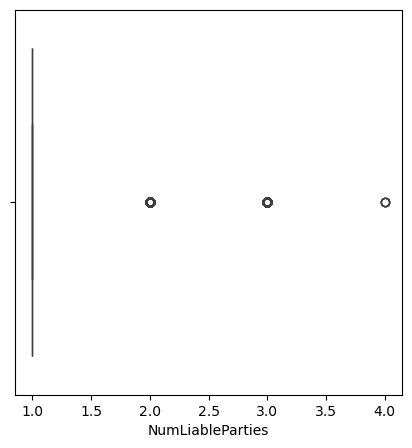

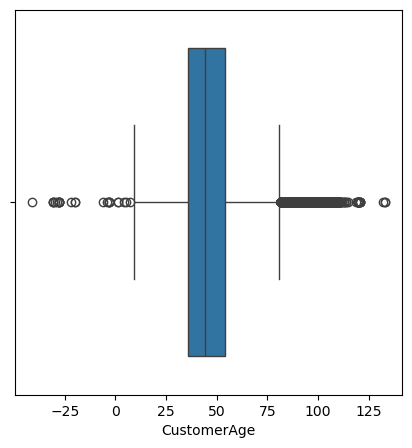

In [41]:
for i in miss_cols:
    plt.figure(figsize = (5,5))
    sns.boxplot(df[i], orient = 'h')
    plt.show()

In [42]:
df[miss_cols]

,PurchasePrice,NumLiableParties,CustomerAge
0,4.22,1.0,53.0
1,4.22,1.0,NaN
2,4.22,1.0,NaN
3,4.22,1.0,NaN
4,4.22,1.0,46.0
...,...,...,...
406418,7.38,1.0,36.0
406419,7.38,1.0,37.0
406420,7.38,1.0,71.0
406421,7.38,1.0,38.0


In [43]:
for i in miss_cols: #understanding the data to decide on best imputation methods
    a = df[i].nunique()
    print(i,a)

PurchasePrice 48
NumLiableParties 4
CustomerAge 126


##### Purchaseprice and customerage contain outliers and are mostly continous in nature therefore median will be used to impute the data

In [44]:
df.PurchasePrice.fillna(df.PurchasePrice.median(), inplace = True)

In [45]:
df.CustomerAge.fillna(df.CustomerAge.median(), inplace = True)
df.CustomerAge.isnull().sum()

0

##### NumLiableParties is a categorical column lets use mode to impute

In [46]:
df.NumLiableParties.fillna(df.NumLiableParties.mode()[0], inplace = True)

In [47]:
df.isnull().sum()

OriginalCreditor[Redacted]    0
CurrentBalance                0
DebtLoadPrincipal             0
Balanaceatdebt_load           0
PurchasePrice                 0
ProductOrDebtType             0
CollectionStatus              0
InBankruptcy                  0
IsLegal                       0
NumLiableParties              0
CustomerAge                   0
NumPhones                     0
NumEmails                     0
NumAddresses                  0
IsStatBarred                  0
dtype: int64

## EDA

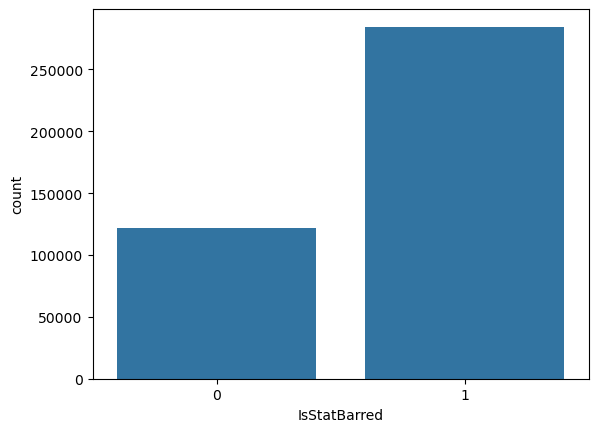

In [48]:
sns.countplot(data = df, x = 'IsStatBarred')
plt.show()

In [49]:
#comparing the target with individual columns

In [50]:
df.head()

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,Creditor 1,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,Y,1.0,53.0,0,0,1,0
1,Creditor 2,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,N,N,1.0,44.0,0,0,1,1
2,Creditor 1,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,1.0,44.0,1,0,1,0
3,Creditor 2,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,N,N,1.0,44.0,1,0,1,1
4,Creditor 1,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,N,Y,1.0,46.0,2,0,1,1


In [51]:
cols = list(df.columns)

In [52]:
len(cols)

15

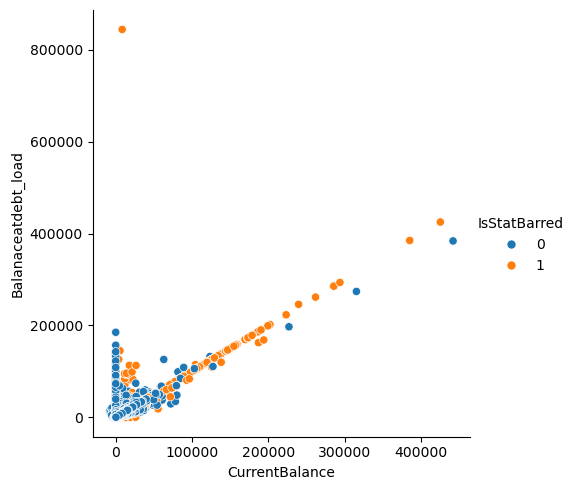

In [53]:
sns.relplot(x = 'CurrentBalance', y = 'Balanaceatdebt_load' , data = df, hue = 'IsStatBarred')
plt.show()

In [54]:
# We can see that current balance and balanceatdebt_load have a linear relationship but the higher the balanceatdebt_load the greater possibility
# of a Statbarred

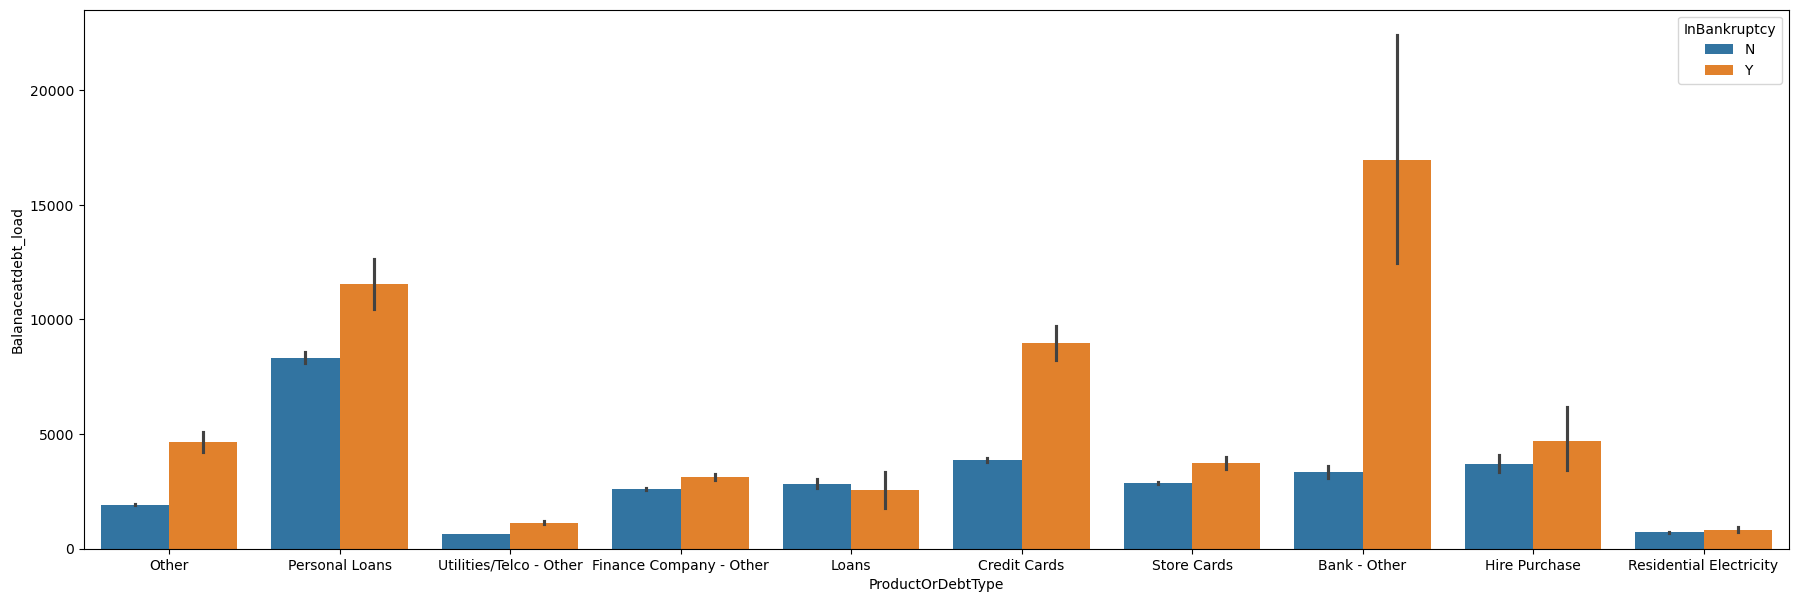

In [55]:
plt.figure(figsize = (22,7))
sns.barplot(y = 'Balanaceatdebt_load', x = 'ProductOrDebtType', hue = 'InBankruptcy', data = df)
plt.show()

In [56]:
# personal loans and banks have a higher Balanceatdebt_load and have a higher number in bankruptcy status.

In [57]:
df.head()

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,Creditor 1,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,Y,1.0,53.0,0,0,1,0
1,Creditor 2,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,N,N,1.0,44.0,0,0,1,1
2,Creditor 1,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,1.0,44.0,1,0,1,0
3,Creditor 2,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,N,N,1.0,44.0,1,0,1,1
4,Creditor 1,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,N,Y,1.0,46.0,2,0,1,1


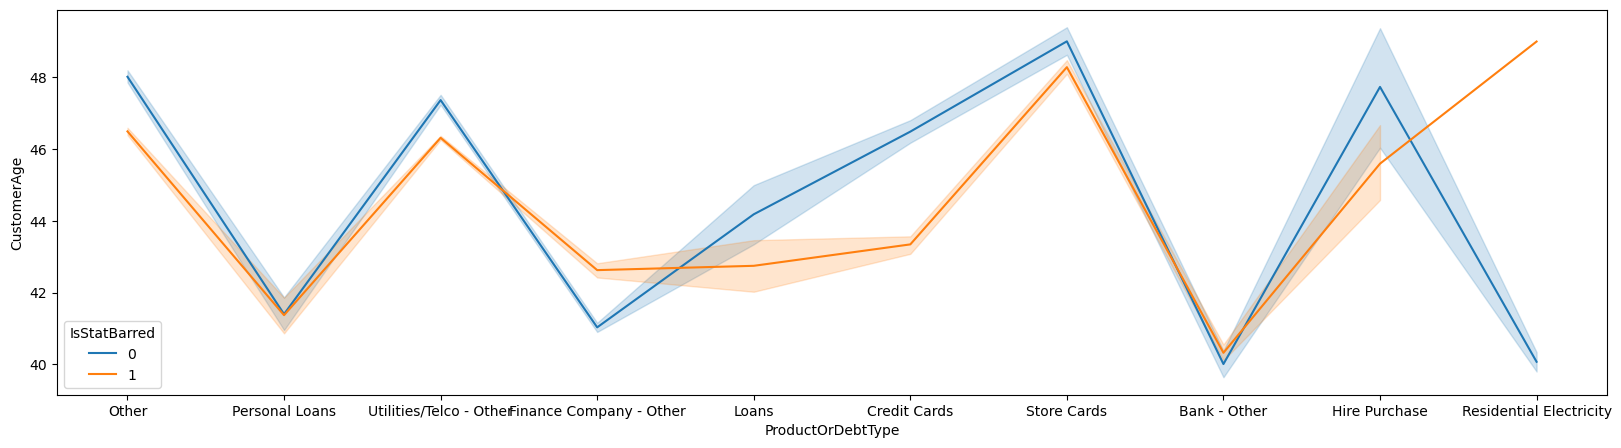

In [58]:
plt.figure(figsize = (20,5))
sns.lineplot(x = 'ProductOrDebtType' , y = 'CustomerAge', hue = 'IsStatBarred', data = df)
plt.show()

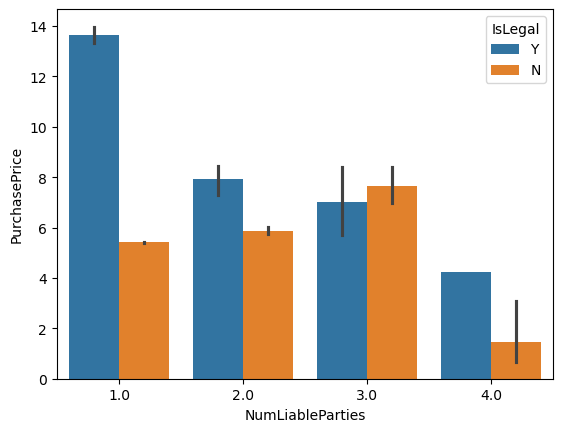

In [59]:
sns.barplot(y = 'PurchasePrice', x = 'NumLiableParties', hue = 'IsLegal', data = df)
plt.show()

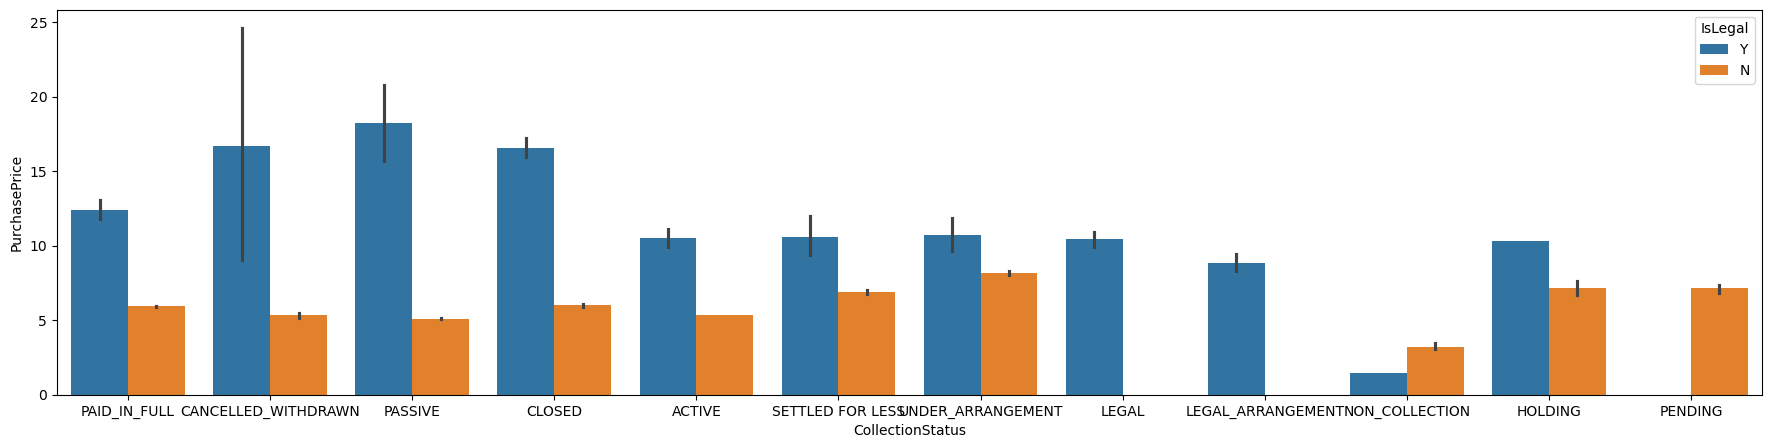

In [60]:
plt.figure(figsize = (22,5))
sns.barplot(y = 'PurchasePrice', x = 'CollectionStatus', hue = 'IsLegal', data = df)
plt.show()

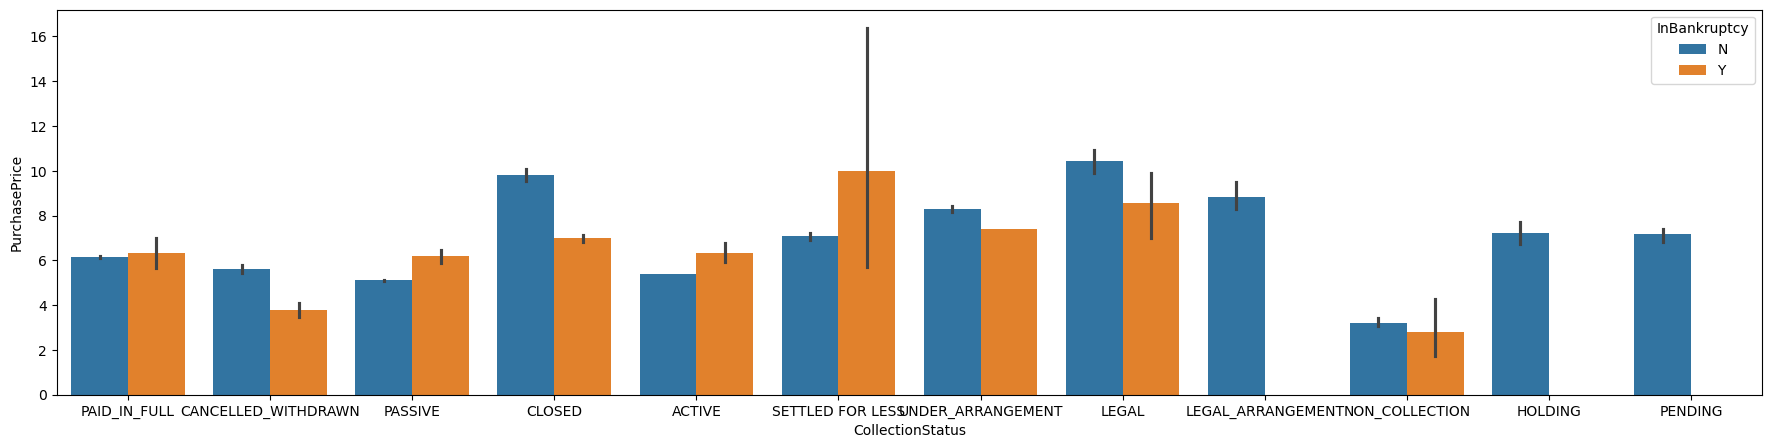

In [61]:
plt.figure(figsize = (22,5))
sns.barplot(y = 'PurchasePrice', x = 'CollectionStatus', hue = 'InBankruptcy', data = df)
plt.show()

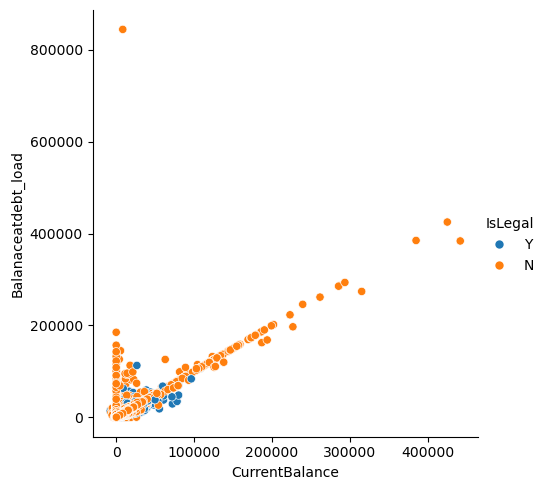

In [62]:
sns.relplot(x = 'CurrentBalance', y = 'Balanaceatdebt_load', data = df, hue = 'IsLegal')
plt.show()

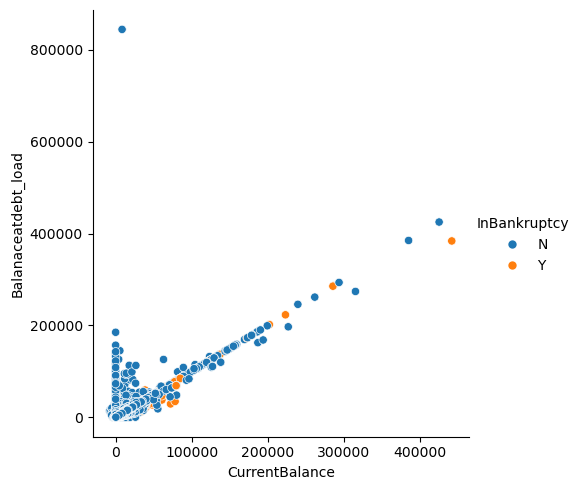

In [63]:
sns.relplot(x = 'CurrentBalance', y = 'Balanaceatdebt_load', data = df, hue = 'InBankruptcy')
plt.show()

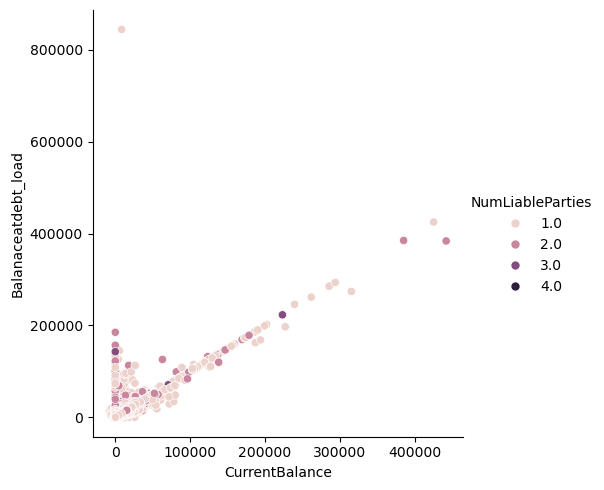

In [64]:
sns.relplot(x = 'CurrentBalance', y = 'Balanaceatdebt_load', data = df, hue = 'NumLiableParties')
plt.show()

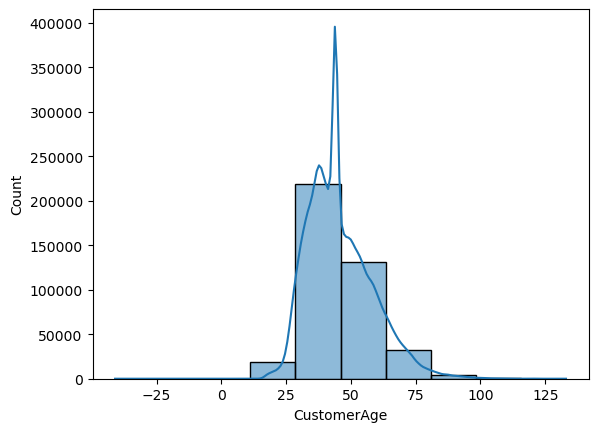

In [65]:
sns.histplot(x = 'CustomerAge', data = df, bins = 10, kde = True)
plt.show()

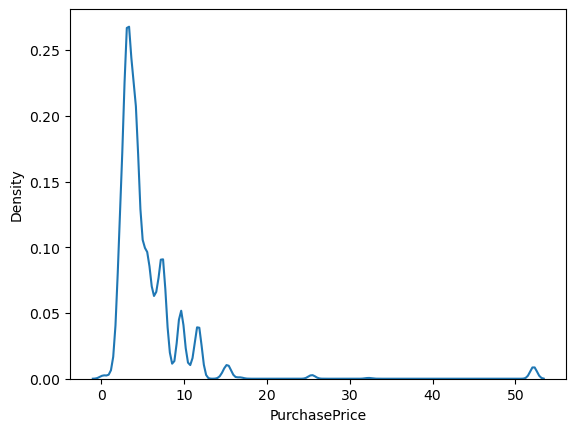

In [66]:
sns.kdeplot(x = 'PurchasePrice', data = df)
plt.show()

In [67]:
print('Pos class:',df.IsStatBarred.value_counts().loc[1]*100/len(df))
print('Neg class:',df.IsStatBarred.value_counts().loc[0]*100/len(df))

Pos class: 70.01276994658275
Neg class: 29.987230053417253


In [68]:
# This is a case of class imbalance we will balance the data going forward.

In [69]:
df.head()

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,Creditor 1,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,Y,1.0,53.0,0,0,1,0
1,Creditor 2,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,N,N,1.0,44.0,0,0,1,1
2,Creditor 1,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,1.0,44.0,1,0,1,0
3,Creditor 2,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,N,N,1.0,44.0,1,0,1,1
4,Creditor 1,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,N,Y,1.0,46.0,2,0,1,1


### Feature Engineering

In [70]:
df['OriginalCreditor[Redacted]'].nunique()

52

In [71]:
df['OriginalCreditor[Redacted]'] = df['OriginalCreditor[Redacted]'].str.replace('Creditor ','')

In [72]:
df['OriginalCreditor[Redacted]'] = df['OriginalCreditor[Redacted]'].astype(int)

In [73]:
df.head()

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,1,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,Y,1.0,53.0,0,0,1,0
1,2,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,N,N,1.0,44.0,0,0,1,1
2,1,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,1.0,44.0,1,0,1,0
3,2,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,N,N,1.0,44.0,1,0,1,1
4,1,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,N,Y,1.0,46.0,2,0,1,1


In [74]:
df.ProductOrDebtType.value_counts()

ProductOrDebtType
Utilities/Telco - Other    212158
Other                       84218
Finance Company - Other     48695
Store Cards                 17699
Credit Cards                16891
Bank - Other                13030
Residential Electricity      7693
Personal Loans               4309
Loans                        1260
Hire Purchase                 470
Name: count, dtype: int64

In [75]:
df.ProductOrDebtType = df.ProductOrDebtType.replace({'Utilities/Telco - Other':'Utilities','Finance Company - Other': 'Finance', 'Bank - Other': 'Banking', 'Personal Loans': 'Loans', 'Residential Electricity': 'Utilities','Hire Purchase': 'Other'})

In [76]:
df.ProductOrDebtType.value_counts()

ProductOrDebtType
Utilities       219851
Other            84688
Finance          48695
Store Cards      17699
Credit Cards     16891
Banking          13030
Loans             5569
Name: count, dtype: int64

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [78]:
df.ProductOrDebtType = le.fit_transform(df.ProductOrDebtType)

In [79]:
df.ProductOrDebtType.value_counts()

ProductOrDebtType
6    219851
4     84688
2     48695
5     17699
1     16891
0     13030
3      5569
Name: count, dtype: int64

In [80]:
df.CollectionStatus.value_counts()

CollectionStatus
ACTIVE                 169489
PASSIVE                138040
PAID_IN_FULL            69172
CLOSED                  13562
CANCELLED_WITHDRAWN      5489
UNDER_ARRANGEMENT        4237
SETTLED FOR LESS         4191
LEGAL                    1559
LEGAL_ARRANGEMENT         361
NON_COLLECTION            237
HOLDING                    59
PENDING                    27
Name: count, dtype: int64

In [81]:
maps = {'CANCELLED_WITHDRAWN': 'OTHER', 'UNDER_ARRANGEMENT': 'OTHER', 
        'SETTLED FOR LESS': 'OTHER', 'LEGAL_ARRANGEMENT': 'LEGAL', 'NON_COLLECTION': 'OTHER',
        'HOLDING':'OTHER','PENDING':'OTHER'}

In [82]:
df.CollectionStatus = df.CollectionStatus.replace(maps)

In [83]:
df.CollectionStatus.value_counts()

CollectionStatus
ACTIVE          169489
PASSIVE         138040
PAID_IN_FULL     69172
OTHER            14240
CLOSED           13562
LEGAL             1920
Name: count, dtype: int64

In [84]:
df.CollectionStatus = le.fit_transform(df.CollectionStatus)

In [85]:
df.head()

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,1,0.0,1160.20,1160.20,4.22,4,4,N,Y,1.0,53.0,0,0,1,0
1,2,182.9,182.90,182.90,4.22,4,3,N,N,1.0,44.0,0,0,1,1
2,1,0.0,538.57,538.57,4.22,4,4,N,N,1.0,44.0,1,0,1,0
3,2,8279.5,8279.50,8279.50,4.22,4,5,N,N,1.0,44.0,1,0,1,1
4,1,0.0,523.00,523.00,4.22,4,4,N,Y,1.0,46.0,2,0,1,1


In [86]:
df.InBankruptcy = le.fit_transform(df.InBankruptcy)
df.IsLegal = le.fit_transform(df.IsLegal)

In [87]:
df.InBankruptcy.value_counts()

InBankruptcy
0    398270
1      8153
Name: count, dtype: int64

In [88]:
df.IsLegal.value_counts()

IsLegal
0    396709
1      9714
Name: count, dtype: int64

In [89]:
df.head()

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred
0,1,0.0,1160.20,1160.20,4.22,4,4,0,1,1.0,53.0,0,0,1,0
1,2,182.9,182.90,182.90,4.22,4,3,0,0,1.0,44.0,0,0,1,1
2,1,0.0,538.57,538.57,4.22,4,4,0,0,1.0,44.0,1,0,1,0
3,2,8279.5,8279.50,8279.50,4.22,4,5,0,0,1.0,44.0,1,0,1,1
4,1,0.0,523.00,523.00,4.22,4,4,0,1,1.0,46.0,2,0,1,1


In [90]:
df['NumContacts'] = df.NumPhones + df.NumEmails + df.NumAddresses
df.head()

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,IsStatBarred,NumContacts
0,1,0.0,1160.20,1160.20,4.22,4,4,0,1,1.0,53.0,0,0,1,0,1
1,2,182.9,182.90,182.90,4.22,4,3,0,0,1.0,44.0,0,0,1,1,1
2,1,0.0,538.57,538.57,4.22,4,4,0,0,1.0,44.0,1,0,1,0,2
3,2,8279.5,8279.50,8279.50,4.22,4,5,0,0,1.0,44.0,1,0,1,1,2
4,1,0.0,523.00,523.00,4.22,4,4,0,1,1.0,46.0,2,0,1,1,3


In [91]:
df.drop(['NumPhones','NumEmails','NumAddresses'], axis = 1, inplace = True)
df.head()

,OriginalCreditor[Redacted],CurrentBalance,DebtLoadPrincipal,Balanaceatdebt_load,PurchasePrice,ProductOrDebtType,CollectionStatus,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,IsStatBarred,NumContacts
0,1,0.0,1160.20,1160.20,4.22,4,4,0,1,1.0,53.0,0,1
1,2,182.9,182.90,182.90,4.22,4,3,0,0,1.0,44.0,1,1
2,1,0.0,538.57,538.57,4.22,4,4,0,0,1.0,44.0,0,2
3,2,8279.5,8279.50,8279.50,4.22,4,5,0,0,1.0,44.0,1,2
4,1,0.0,523.00,523.00,4.22,4,4,0,1,1.0,46.0,1,3


In [92]:
cols = list(df.columns)

In [93]:
cols

['OriginalCreditor[Redacted]',
 'CurrentBalance',
 'DebtLoadPrincipal',
 'Balanaceatdebt_load',
 'PurchasePrice',
 'ProductOrDebtType',
 'CollectionStatus',
 'InBankruptcy',
 'IsLegal',
 'NumLiableParties',
 'CustomerAge',
 'IsStatBarred',
 'NumContacts']

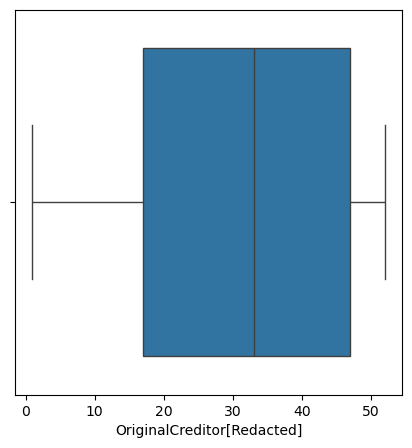

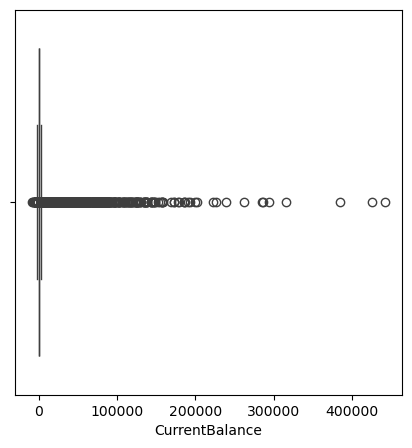

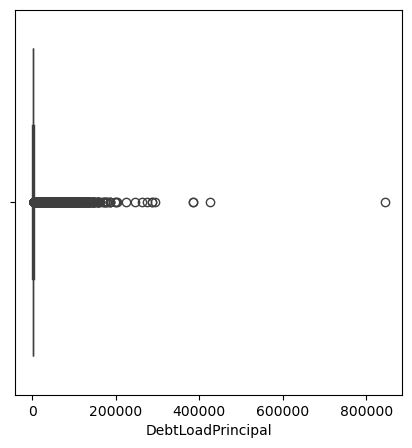

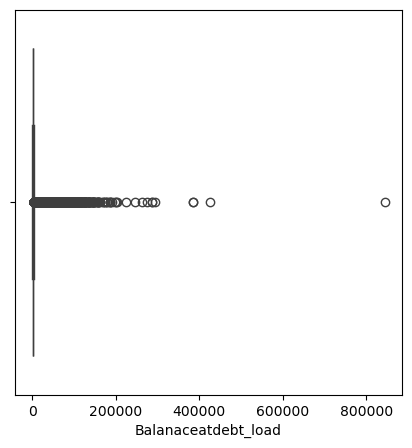

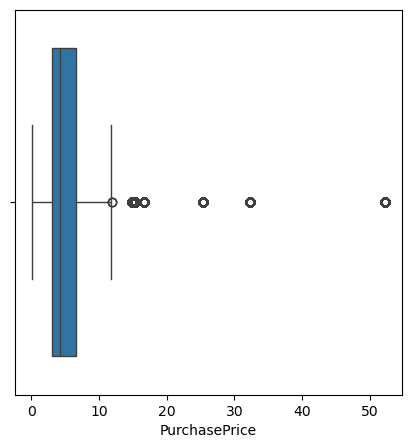

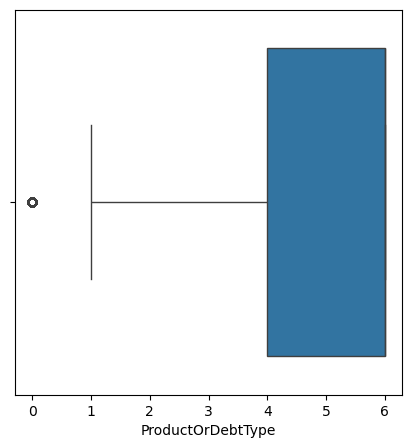

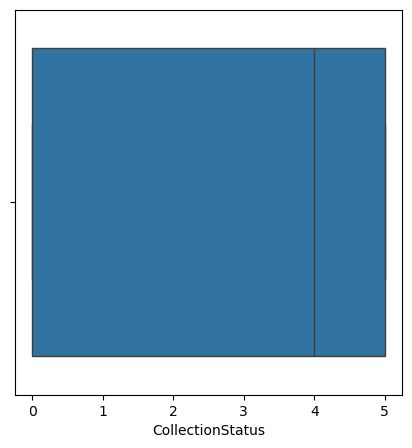

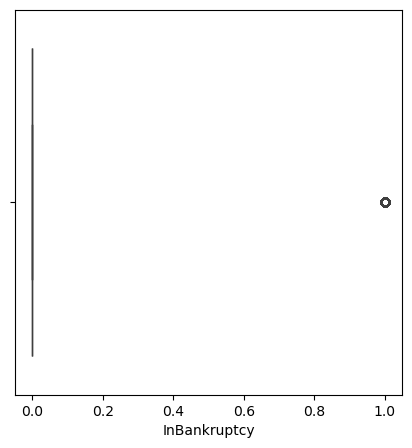

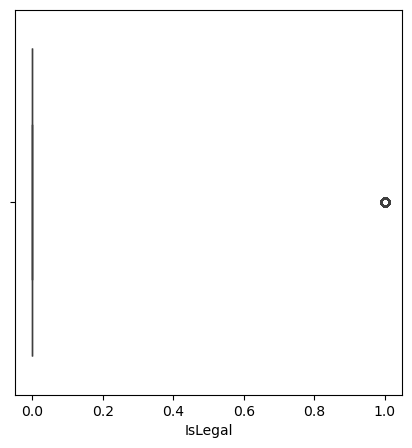

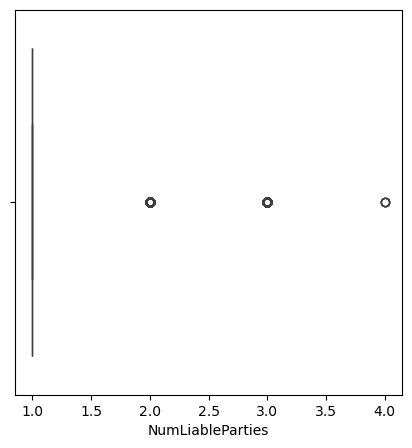

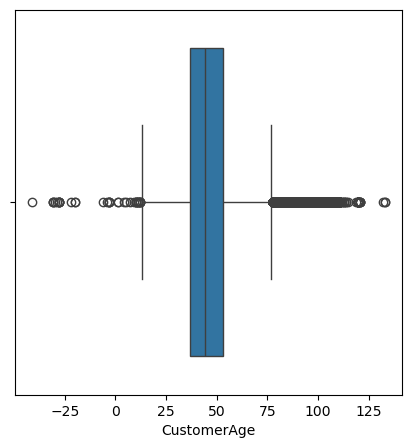

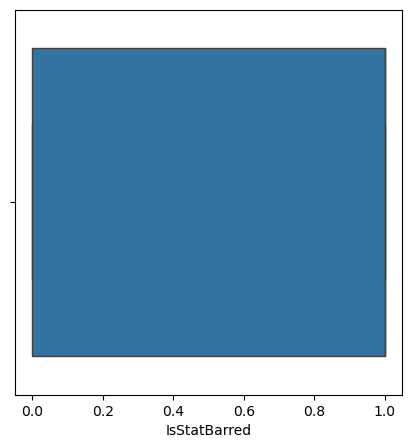

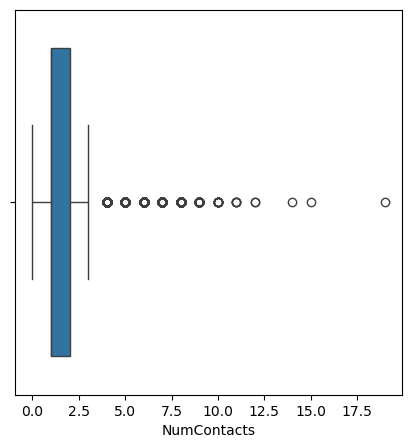

In [94]:
for i in cols:
    plt.figure(figsize = (5,5))
    sns.boxplot(df[i], orient = 'h')
    plt.show()

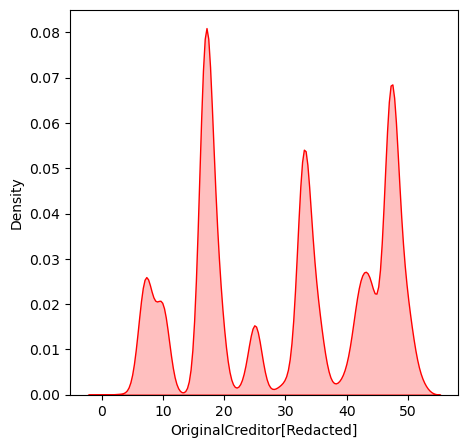

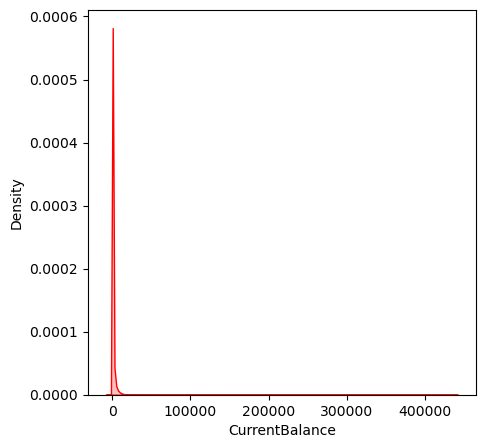

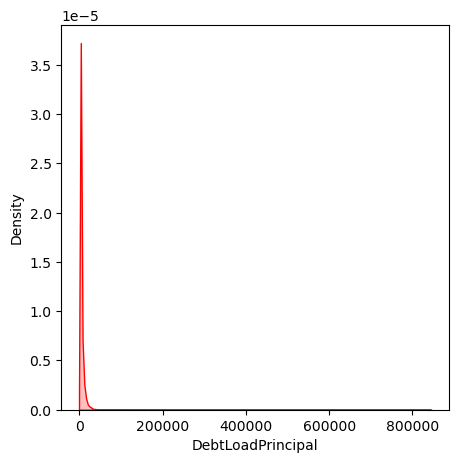

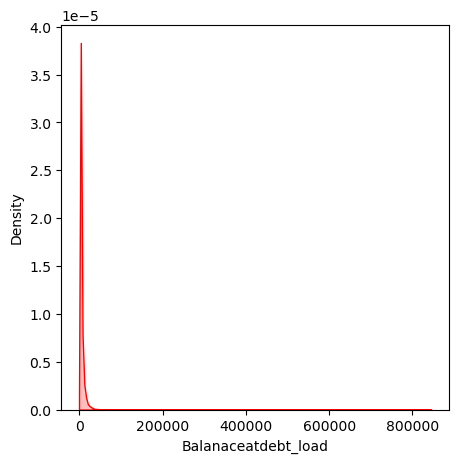

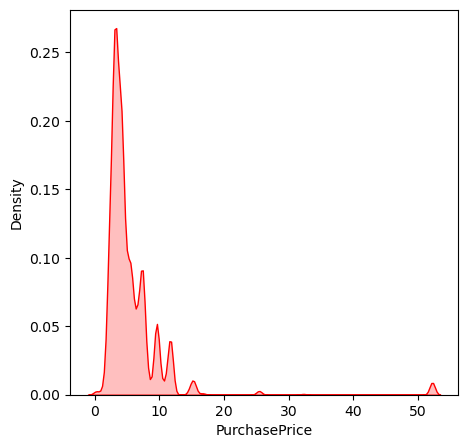

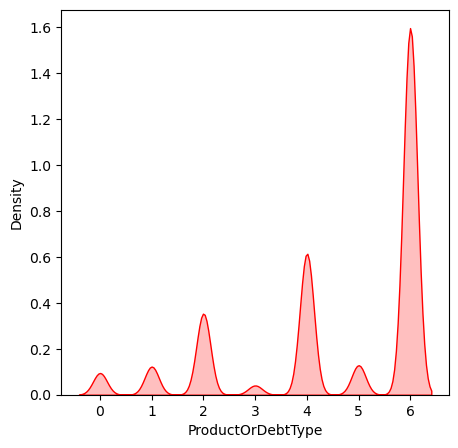

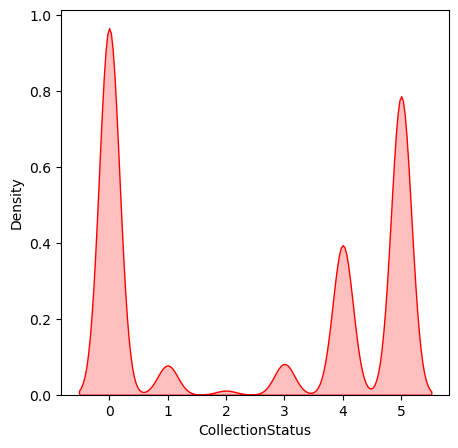

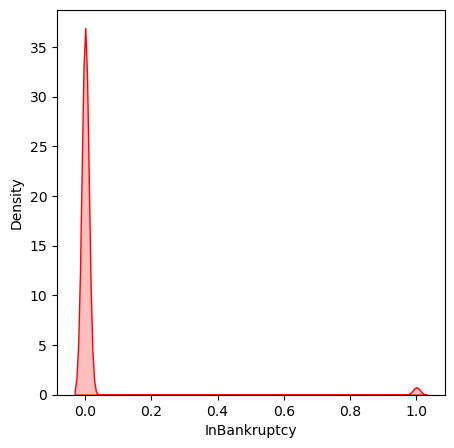

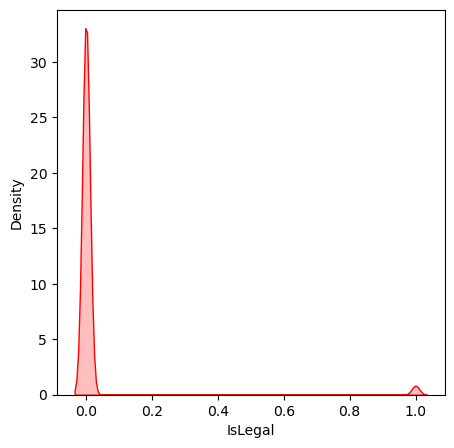

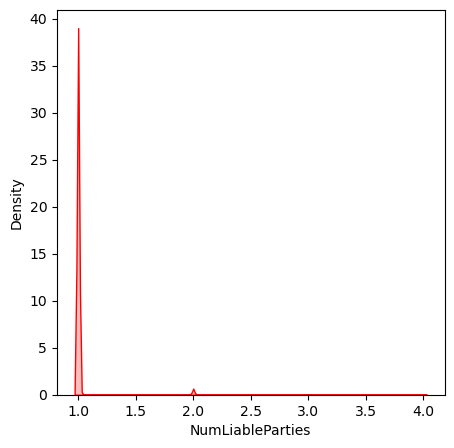

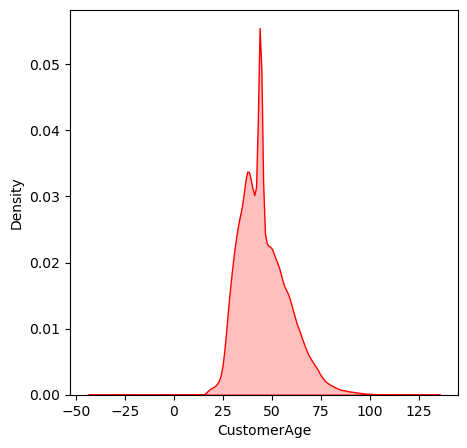

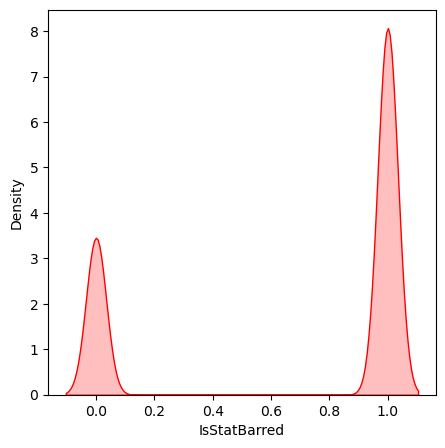

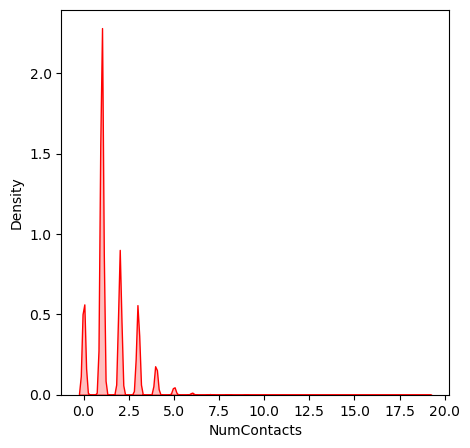

In [95]:
for i in cols:
    plt.figure(figsize = (5,5))
    sns.kdeplot(x = df[i], data = df, shade = True, color = 'red')
    plt.show()

In [96]:
x = df.drop('IsStatBarred', axis = 1)
y = df.IsStatBarred

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)
mm = MinMaxScaler()
xtrain = mm.fit_transform(xtrain)
xtest = mm.transform(xtest)

In [98]:
xtrain_df = pd.DataFrame(xtrain, columns = list(x.columns))

In [99]:
xtrain_df['OriginalCreditor[Redacted]']

0         0.627451
1         0.313725
2         0.470588
3         0.313725
4         0.352941
            ...   
325133    0.627451
325134    0.862745
325135    0.470588
325136    0.470588
325137    0.313725
Name: OriginalCreditor[Redacted], Length: 325138, dtype: float64

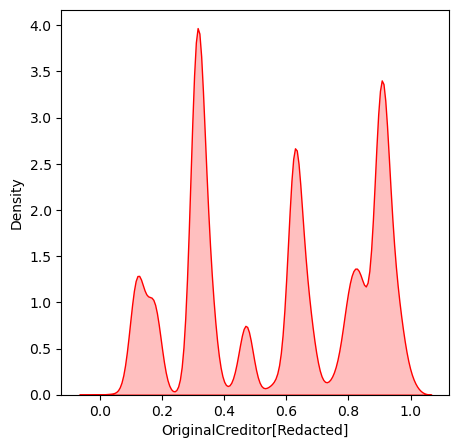

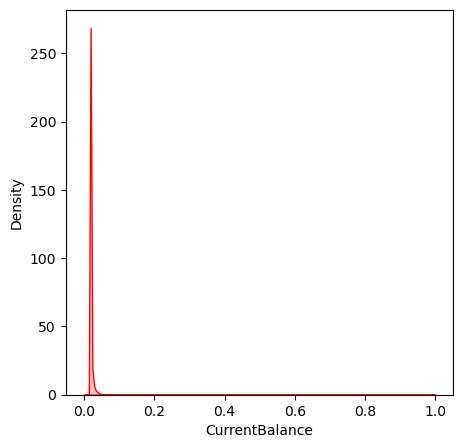

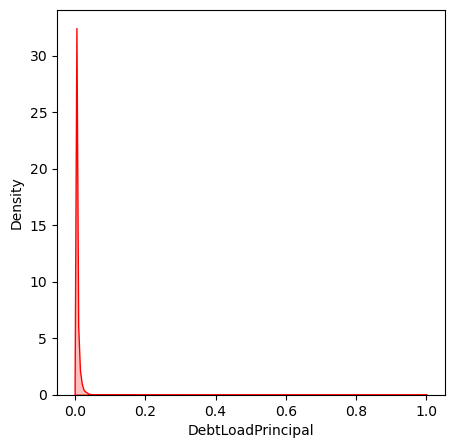

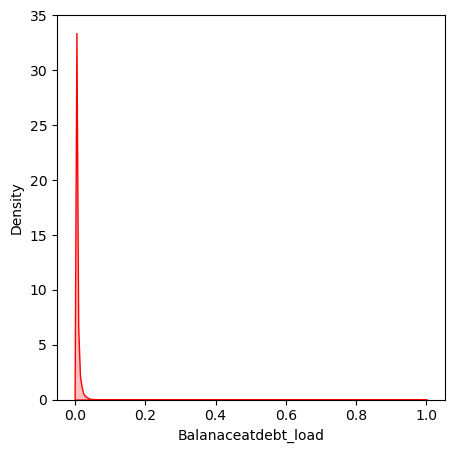

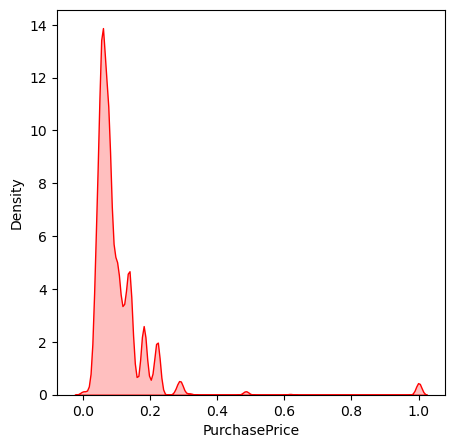

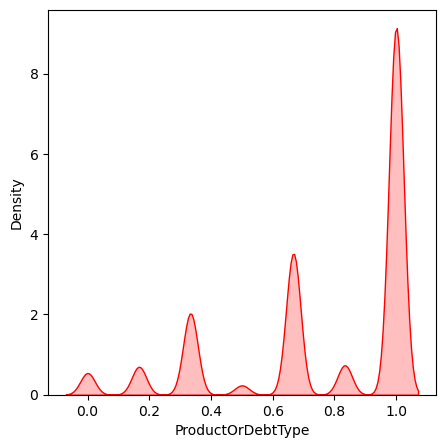

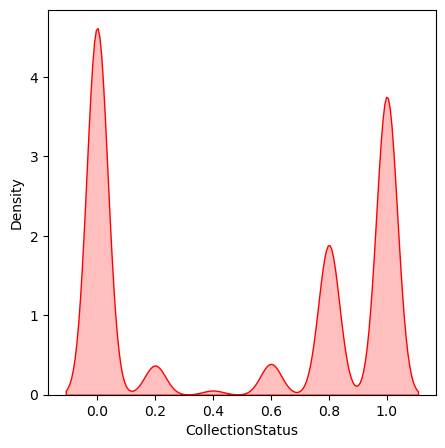

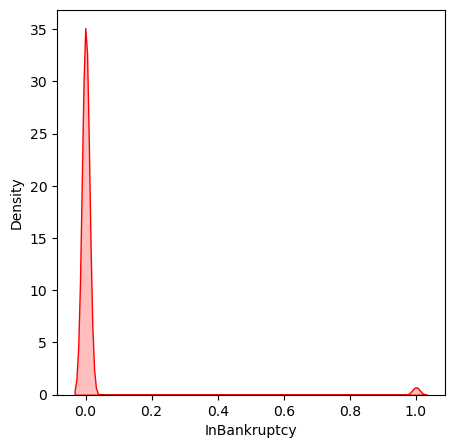

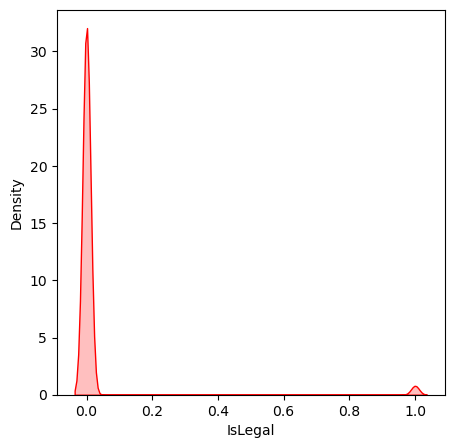

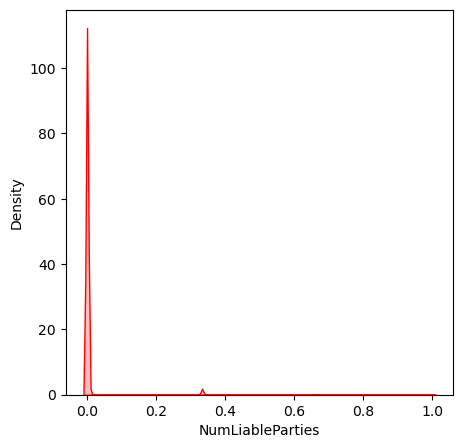

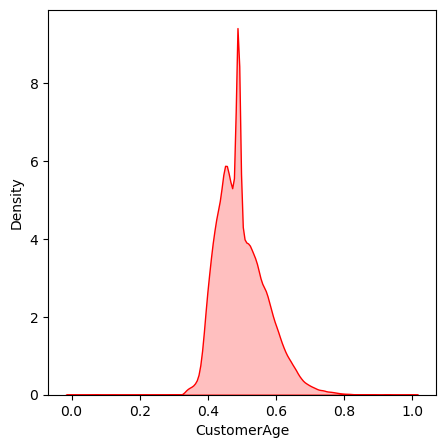

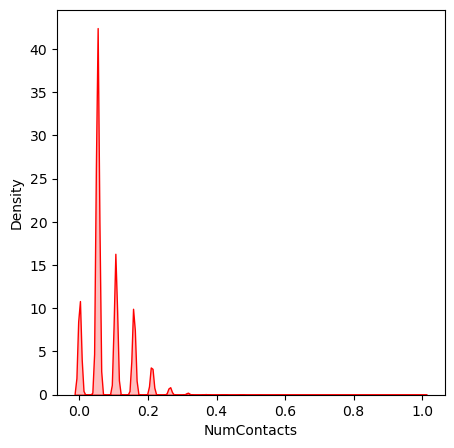

In [100]:
cols = list(xtrain_df.columns)
for i in cols:
    plt.figure(figsize = (5,5))
    sns.kdeplot(x = xtrain_df[i], data = xtrain_df, shade = True, color = 'red')
    plt.show()

In [101]:
# Balancing the data
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy = 'minority', random_state = 42)
x_res, y_res = smt.fit_resample(xtrain,ytrain)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

models = {'logistic_regression': LogisticRegression(),
          'decision_tree': DecisionTreeClassifier(),
          'randomforest': RandomForestClassifier(),
          'xgb': XGBClassifier()}


In [103]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

def evaluate(ytest, ypred):
    acc = accuracy_score(ytest, ypred)
    rec = recall_score(ytest, ypred)
    precision = precision_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    roc = roc_auc_score(ytest, ypred)
    return acc, rec, precision, f1, roc

def total_cost(ytest, ypred):
    tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()
    cost = 10*fp + 500*fn
    return cost
    
    

In [116]:
def model_train(x_res, y_res,ytest, xtest, models):
    model_list = []
    cost = []
    for name, mod in models.items():
        mod.fit(x_res, y_res)
        model_list.append(name)
        ypred = mod.predict(xtest)
        acc, rec, precision, f1, roc = evaluate(ytest, ypred)
        costs = total_cost(ytest, ypred)
        cost.append(costs)



        print(name)
        print('Model preformance')
        print('accuracy: ', acc)
        print('recall: ', rec)
        print('precision: ', precision)
        print('f1: ', f1)
        print('Roc: ', roc)
        print('cost: ', costs)
        print('='*50)



    model_report = pd.DataFrame(list(zip(model_list, cost)), columns = ['Model_name', 'Cost']).sort_values(by=['Cost'])
    return model_report



        
        

In [117]:
model_report = model_train(x_res, y_res,ytest, xtest, models)

logistic_regression
Model preformance
accuracy:  0.794131758627053
recall:  0.7995647290087055
precision:  0.8955376449773934
f1:  0.8448343007621979
Roc:  0.7904812826005312
cost:  5763140
decision_tree
Model preformance
accuracy:  0.9619733038075906
recall:  0.9676179443976411
precision:  0.9778987885130461
f1:  0.9727312025266204
Roc:  0.9581806041046992
cost:  934960
randomforest
Model preformance
accuracy:  0.969108691640524
recall:  0.9746559955068801
precision:  0.9811480768211452
f1:  0.9778912612810918
Roc:  0.965381393615055
cost:  732670
xgb
Model preformance
accuracy:  0.9713108199544811
recall:  0.9762707104745858
precision:  0.982686735919723
f1:  0.9794682162352527
Roc:  0.9679782117924782
cost:  685800


In [118]:
model_report

,Model_name,Cost
3,xgb,685800
2,randomforest,732670
1,decision_tree,934960
0,logistic_regression,5763140


In [119]:
# Selecting XGboost as the final model.

In [121]:
from sklearn.model_selection import cross_val_score, KFold
xgb = XGBClassifier()
num_folds = 5
kf = KFold(n_splits = num_folds, shuffle = True, random_state = 42)
cv_score = cross_val_score(xgb, x_res, y_res, cv = kf)
print('Cross Val Accuracy', cv_score.mean())

Cross Val Accuracy 0.9804852461943663


In [123]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
param_dist = {'n_estimators': [100,150,200],
              'learning_rate': [0.1, 0.01, 0.25],
              'max_depth': [3,5,7]}

CV = GridSearchCV(estimator = xgb, param_grid = param_dist, n_jobs = 3,scoring = 'accuracy')
CV.fit(x_res, y_res)
print('The best parameters for XGBoost are: ', CV.best_params_)

The best parameters for XGBoost are:  {'learning_rate': 0.25, 'max_depth': 7, 'n_estimators': 200}


In [125]:
CV.best_estimator_.set_params(learning_rate = 0.25, max_depth = 7, n_estimators=200)
CV.fit(x_res, y_res)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid={'learning_rate': [0.1, 0.01, 0.25],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [126]:
predictions = CV.predict(xtest)

In [127]:
acc, rec, precision, f1, roc = evaluate(ytest, predictions)
print('Final Model XGboost model performance: ')
print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', precision)
print('F1: ', f1)
print('roc: ', roc)

Final Model XGboost model performance: 
Accuracy:  0.9722458018084518
Recall:  0.9779380791912384
Precision:  0.9823865439543003
F1:  0.9801572642355797
roc:  0.9684210943901399


In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, predictions)

array([[23310,   999],
       [ 1257, 55719]], dtype=int64)

In [2]:
d={'name':'hello'}

In [1]:
output = {'n':'hello','a':'hello','m':'hello','e':'hello'}

In [18]:
val = d['name']
for i in d.items():
    a = i[0]
out = {}
for i in a:
    out[i] = val
print(out)
    
    
    

{'n': 'hello', 'a': 'hello', 'm': 'hello', 'e': 'hello'}
